# Проект 2. Исследовательский анализ данных.

## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

#### 1) есть типы данных int, float, bool, object. Некоторые столбцы (число этажей, балконов и др) можно перевести в целочисленный тип для удобства.

#### 2) всего в таблице 23699 строк и методом isnull() определяем в каких столбцах сколько пропусков, которые далее надо будет обработать. Таких пропусков достаточно много. На данном этапе предполагаю, что в некотоых местах они могут быть удалены, а в каких-то являются важной информацией.

#### 3) метод .describe() показывает что в некоторых столбцах могут быть ошибки/выбросы/некорректные значения (например вряд ли бывает высота потолков 100 метров).

### Шаг 2. Предобработка данных

In [5]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
print(df['ceiling_height'].isnull().sum())
print(df['ceiling_height'].mean())
print(df['ceiling_height'].median())
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
df['ceiling_height'].round(1)
df['ceiling_height'].isnull().sum()

9195
2.77149889685604
2.65


0

#### ceiling_height - пропуски заменены на среднюю высоту потолков. (среднее с медианой отличаются слабо)

In [8]:
print(df['floors_total'].isnull().sum())
print(df['locality_name'].isnull().sum())
df.dropna(subset = ['floors_total','locality_name'], inplace=True)
print(df['floors_total'].isnull().sum())
print(df['locality_name'].isnull().sum())

86
49
0
0


#### строки с пропущенными значениями в locality_name и floors_total удалены совсем, потому что 1) нет смысла в данных по недвижимости без ее местоположения (населенного пункта); 2) потому что этих строк очень мало.

In [9]:
print(df['living_area'].isnull().sum())
print(df['living_area'].mean())
print(df['living_area'].median())
df['living_area'] = df['living_area'].fillna(df['living_area'].median())
print(df['living_area'].isnull().sum())

1865
34.454821728663596
30.0
0


#### пропущенная прощадь в living_area заменена на медианную, так как это лучше характеризует распределение

In [10]:
print(df['is_apartment'].isnull().sum())

20805


In [11]:
#df.query('is_apartment != True').head(2)
df['is_apartment'] = df['is_apartment'].fillna(False)
df.query('is_apartment == 0').head(2)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


In [12]:
print(df['is_apartment'].isnull().sum())


0


#### Для is_apartment пропущенное значение означало что это не апартаменты. False заменено на 0, True на 1. Возможно так удобнее далее с этой информацией работать. 

In [13]:
print(df['kitchen_area'].isnull().sum())
print(df['kitchen_area'].mean())
print(df['kitchen_area'].median())
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
print(df['kitchen_area'].isnull().sum())

2222
10.560994236986366
9.1
0


#### Пропуски в kitchen_area заменены на медиану. При наличии больших знаений медиана хорошо характеризует распределение. 

In [14]:
print(df['balcony'].isnull().sum())
print(df['balcony'].isna().sum())
df['balcony'] = df['balcony'].fillna(0)
print(df['balcony'].isnull().sum())
print(df['balcony'].isna().sum())

11475
11475
0
0


#### Пропуски в столбце balcony заменены на 0. Вероятно, если у людей нет балкона, то они просто его не указали

In [15]:
print(df['days_exposition'].isnull().sum())
print(df['days_exposition'].mean())
print(df['days_exposition'].median())
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
print(df['days_exposition'].isnull().sum())

3171
180.7413945278023
95.0
0


#### пропуски в days_exposition заменены на медианное значение. Почему они появились есть 2 гипотезы: 1) объявление до сих пор в продаже, 2) какой-то сбой при введении данных.. Не знаю

In [16]:
print(df['cityCenters_nearest'].isnull().sum())
print(df.isnull().sum())
print(df.isna().sum())

5501
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                

#### В столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest Я не знаю на какое значение можно сделать замену. Заметил закономерность, что часто если отсутствуют значения во всех этих столбцах одновременно, то мы имеем дело с недвижимостью в каком-то поселке, деревне и т.п. Возможно удалять строки с этими данными некорректно, потому что будут потеряны данные о других населенных пунктах в Ленобласти. И число НаНов составляет большую долю датасета. Тем не менее и заменить на что неясно...

#### Если в радиусе 3000 м нет парка или пруда, то пропущенное значение можно заменить на ноль!

In [17]:
print(df['parks_around3000'].isnull().sum())
df['parks_around3000'] = df['parks_around3000'].fillna(0)
print(df['parks_around3000'].isnull().sum())

5500
0


In [18]:
print(df['ponds_around3000'].isnull().sum())
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
print(df['ponds_around3000'].isnull().sum())

5500
0


In [19]:
print(df['cityCenters_nearest'].isnull().sum())
df.dropna(subset = ['cityCenters_nearest'], inplace = True)
df.dropna(subset = ['airports_nearest'], inplace = True)
print(df['cityCenters_nearest'].isnull().sum())

5501
0


#### Было принято решение удалиить строки с расстоянием до центра и аэропортов, так как один из пунктов анализа предполагает проверку связи между удаленностью от центра и ценой на квартиру. с пропущенным значением этой зависимости сделать не получится

In [20]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           10031
ponds_around3000            0
ponds_nearest            9012
days_exposition             0
dtype: int64

In [21]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14.0,30.0,9,False,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.771499,26.0,10.6,6,False,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.771499,24.0,30.0,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.500000,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.670000,12.0,20.3,3,False,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,2.771499,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0


#### Видно,что если число парков и прудов в пределах 3000м равно нулю, то пропущено значение до ближайшего пруда или парка. заменять такие пропуски не на что.

In [22]:
df['last_price'] = df['last_price'].astype('int')
df['ceiling_height'] = df['ceiling_height'].round(1)
df['is_apartment'] = df['is_apartment'].astype('int')
df['open_plan'] = df['open_plan'].astype('int')
df['studio'] = df['studio'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int', errors='ignore')
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('Int64')
df['days_exposition'] = df['days_exposition'].astype('int')
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,0,0,0,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.8,14,30.0,9,0,0,0,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,0,0,0,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121
6,6,3700000,37.3,2017-11-02,1,2.8,26,10.6,6,0,0,0,14.4,1,посёлок Парголово,52996,19143,0,NaN,0,NaN,155
7,5,7915000,71.6,2019-04-18,2,2.8,24,30.0,22,0,0,0,18.9,2,Санкт-Петербург,23982,11634,0,NaN,0,NaN,95
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,0,0,0,6.5,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289
10,5,5050000,39.6,2017-11-16,1,2.7,12,20.3,3,0,0,0,8.5,0,Санкт-Петербург,38357,13878,1,310,2,553,137
11,9,3300000,44.0,2018-08-27,2,2.8,5,31.0,4,0,0,0,6.0,1,Ломоносов,48252,51677,0,NaN,0,NaN,7


#### Столбцы с булевыми значениями заменены на 0 и 1. Кажется так удобнее. 
#### Столбцы с числом этажей, балконов, числом парков, прудов и дней в продаже не могут быть не целыми числами.
#### Cтолбцы с расстоянием до аэропорта, центра города, ближайшего парка/пруда достаточно большие и десятые доли метра просто не влияют на результат.

In [23]:
df.duplicated().sum()

0

In [24]:
df['locality_name'].value_counts()

Санкт-Петербург            15567
посёлок Шушары               436
Пушкин                       368
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 174
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              43
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Песочный               4
посёлок Репино                 4
посёлок Александровская        2
посёлок Лисий Нос              2
посёлок Усть-Ижора             2
посёлок Белоостров             1
поселок Лисий Нос              1
посёлок Петро-Славянка         1
посёлок Левашово               1
Name: locality_name, dtype: int64

In [25]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')

In [26]:
df['locality_name'].value_counts()

Санкт-Петербург            15567
поселок Шушары               436
Пушкин                       368
Колпино                      337
поселок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 174
Ломоносов                    132
Кронштадт                     95
поселок Металлострой          66
поселок Стрельна              43
Павловск                      38
Зеленогорск                   24
поселок Понтонный             20
поселок Саперный               6
поселок Молодежное             5
поселок Репино                 4
поселок Песочный               4
поселок Лисий Нос              3
поселок Александровская        2
поселок Усть-Ижора             2
поселок Петро-Славянка         1
поселок Левашово               1
поселок Белоостров             1
Name: locality_name, dtype: int64

In [27]:
df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      15567
поселок Шушары         436
Пушкин                 368
Колпино                337
поселок Парголово      327
Петергоф               201
Сестрорецк             183
Красное Село           174
Ломоносов              132
Кронштадт               95
Name: locality_name, dtype: int64

### Шаг 3. Посчитайте и добавьте в таблицу

In [28]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,0,0,0,11.0,2,поселок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.8,14,30.0,9,0,0,0,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,0,0,0,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


In [29]:
df['sqmeter_cost'] = df['last_price'] / df['total_area']
df['sqmeter_cost'] = df['sqmeter_cost'].astype('int')
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,0,0,0,11.0,2,поселок Шушары,12817,18603,0,NaN,0,NaN,81,82920


In [30]:
df['day'] = df['first_day_exposition'].dt.dayofweek 
df['day_name'] = df['first_day_exposition'].dt.day_name() 
df['month'] = df['first_day_exposition'].dt.month 
df['month_name'] = df['first_day_exposition'].dt.month_name()
df['year'] = df['first_day_exposition'].dt.year 
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost,day,day_name,month,month_name,year
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,Thursday,3,March,2019
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,0,0,0,11.0,2,поселок Шушары,12817,18603,0,NaN,0,NaN,81,82920,1,Tuesday,12,December,2018


#### Добавлены столбцы с номером и названием дня, месяца, годом.

#### Проведена категоризация по этажности квартиры: выделен этаж квартиры: первый, последний, другой .

In [31]:
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor >= floors_total:
        return 'последний'
    return 'другой'

df['floor_group'] = df.apply(floor_group, axis=1)
df['floor_group'].value_counts()

другой       13730
последний     2321
первый        1989
Name: floor_group, dtype: int64

In [32]:
#df[df['floor_group'] == 'последний'].head()
#df[df['floor_group'] == 'первый'].head()
df[df['floor_group'] == 'другой'].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost,day,day_name,month,month_name,year,floor_group
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,Thursday,3,March,2019,другой
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,Thursday,8,August,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.8,14,30.0,9,0,0,0,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,Friday,7,July,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,0,0,0,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,Tuesday,6,June,2018,другой
6,6,3700000,37.3,2017-11-02,1,2.8,26,10.6,6,0,0,0,14.4,1,поселок Парголово,52996,19143,0,NaN,0,NaN,155,99195,3,Thursday,11,November,2017,другой


#### Создан столбец с категориями по этажу: последний, первый или другой

In [33]:
df['living_total_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_total_area_ratio'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost,day,day_name,month,month_name,year,floor_group,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,Thursday,3,March,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,0,0,0,11.0,2,поселок Шушары,12817,18603,0,NaN,0,NaN,81,82920,1,Tuesday,12,December,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,Thursday,8,August,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.8,14,30.0,9,0,0,0,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,Friday,7,July,2015,другой,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,0,0,0,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,Tuesday,6,June,2018,другой,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.


In [34]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().astype('float32').round(2)

,total_area,last_price,rooms,ceiling_height
count,18040.000000,18040.0,18040.00,18040.00
mean,63.270000,7560230.5,2.14,2.79
std,38.500000,12144036.0,1.12,0.99
min,12.000000,12190.0,0.00,1.00
25%,41.200001,4000000.0,1.00,2.60
50%,54.000000,5250000.0,2.00,2.80
75%,73.000000,7650000.0,3.00,2.80
max,900.000000,763000000.0,19.00,100.00


In [35]:
print(df[['total_area', 'last_price', 'rooms', 'ceiling_height']].median().round(1))

total_area             54.0
last_price        5250000.0
rooms                   2.0
ceiling_height          2.8
dtype: float64


In [36]:
df.query('total_area > 100')['total_area'].count()

1736

In [37]:
df.query('ceiling_height < 2')#['ceiling_height'].count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost,day,day_name,month,month_name,year,floor_group,living_total_area_ratio,kitchen_total_area_ratio
16934,5,4100000,40.0,2017-10-17,1,1.8,37,17.4,5,0,0,0,8.34,0,Санкт-Петербург,18732,20444,0,NaN,3,80,71,102500,1,Tuesday,10,October,2017,другой,0.435000,0.208500
22590,16,6000000,55.0,2018-10-31,2,1.0,12,32.4,7,0,0,0,10.00,0,Санкт-Петербург,33053,14217,2,293,2,289,13,109090,2,Wednesday,10,October,2018,другой,0.589091,0.181818


In [38]:
#df.query('ceiling_height > 5').count()

#### По таблице выше видно, что:

#### 1) площадь квартиры в основном лежит в диапазоне 40-69 м2, при этом медианная площадь=52 м2, средняя 60 м2, что связано с влиянием небольшого числа квартир большой площади. Причем квартир больше 100 м2 всего 1820/23565=7%.

#### 2) цена продажи лежит в основном лежит в диапазоне 3400000 - 6790000, медианная 4646000, средняя 6540058 рублей. А самая дорогая недвижимость - с самой большой площадью, что закономерно.

#### 3) в основном в объектах 1-3 комнаты, в среднем 2 шт, но есть и хоромы по 19 комнат)))

#### 4) высота потолков в основном в диапазоне 2.6-2.8 м, при этом есть странное значение 1 м (минимум) и вообще квартир с потолками ниже 2 метров всего 3. Предположу, что это либо ошибки, либо какие-то деревенские постройки. но потолок 1.8 метра в теории может быть... Странно выбивается значение 100 м. цена 15 млн, это апартаменты, возможно это целый пятиэтажный дом апартаментов, и указали высоту дома, а не потолков. либо это просто ошибка


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed620a6390>]],
      dtype=object)

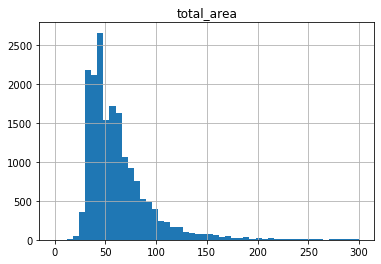

In [39]:
df.hist('total_area', bins=50, range=(0,300))


Гистограмма ограничена в диапазоне 0-300, т.к. площадей более 300 мало

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed61530210>]],
      dtype=object)

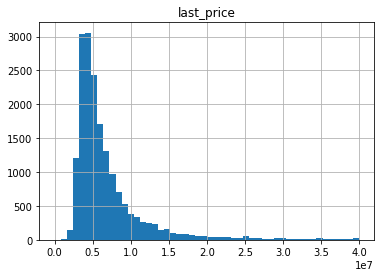

In [40]:
df.hist('last_price', bins=50, range=(0,40000000))


диапазон 0-40 млн, больше на графике не читается.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed61f33ad0>]],
      dtype=object)

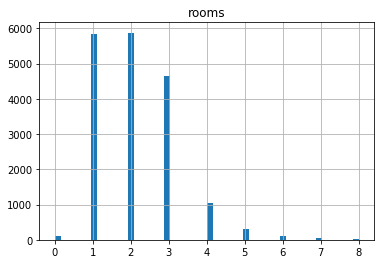

In [41]:
df.hist('rooms', bins=50, range=(0,8))


диапазон 0-8 комнат. Больше нечитаемо

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed61ecba50>]],
      dtype=object)

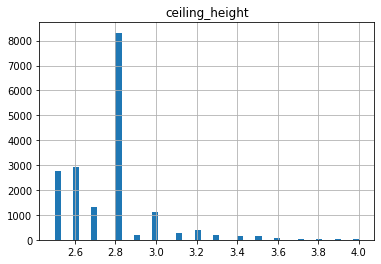

In [42]:
df.hist('ceiling_height', bins=50, range=(2.5,4))

диапазон наглядных значений 2.5-4 метра высота потолков

#### В целом вид распределения гистограмм соответствует распределению Пуассона. Эти показатели не могут быть отрицательными, есть явный пик , в котором лежит основное число значений 25 - 75 квартиль, тянется длинный хвост с выбивающимися большими значениями.

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [43]:
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost,day,day_name,month,month_name,year,floor_group,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,Thursday,3,March,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,0,0,0,11.0,2,поселок Шушары,12817,18603,0,NaN,0,NaN,81,82920,1,Tuesday,12,December,2018,первый,0.460396,0.272277


In [44]:
print(df['days_exposition'].describe().round(1))
print('median     ', df['days_exposition'].median())

count    18040.0
mean       171.2
std        210.6
min          1.0
25%         46.0
50%         95.0
75%        202.0
max       1572.0
Name: days_exposition, dtype: float64
median      95.0


#### Кому-то повезло очень хорошо - продал за один день, а кто-то продавал свой объект 1580/365=4.3 года. В среднем продавали 169 дней, медианно 95 дней. (среднее увеличено из-за долгих единичных продаж)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5f1e09d0>]],
      dtype=object)

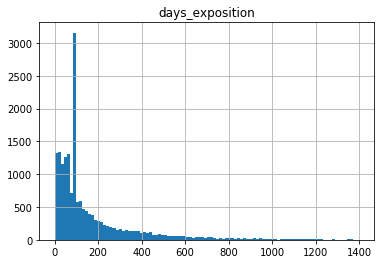

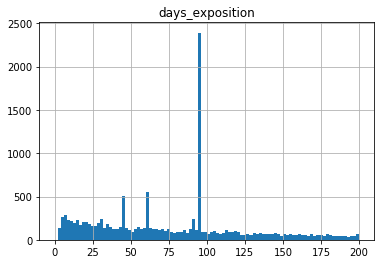

In [45]:
df.hist('days_exposition', bins=100, range=(0, 1400))
df.hist('days_exposition', bins=100, range=(0, 200))

#### на гистограмме видно снова распределение Пуассона и то, что есть 3 пика: в районе 30-40 дня, в районе 60 дня и в районе 90 дня, вероятно последнее и есть значение медианы. 
#### Думаю, что очень быстрая продажа - до первого квартиля 25% значений, то есть до 45 дней, а очень долгая - после 3 квартиля 75%, то есть больше 198-200 дней.

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5ef76f50>]],
      dtype=object)

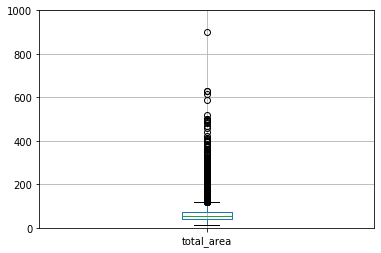

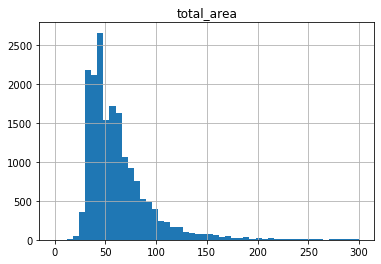

In [46]:
df.boxplot('total_area')
plt.ylim(0, 1000)
df.hist('total_area', bins=50, range=(0,300))

#### по боксплоту видно, что основные значения площади примерно 40-70 м2, и есть очень много выбросов. Делаю вывод, что слишком большая площадь это площади более 250 м2

In [47]:
good_total_area = df.query('total_area <= 250')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5ede8210>]],
      dtype=object)

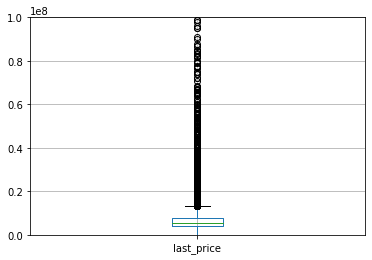

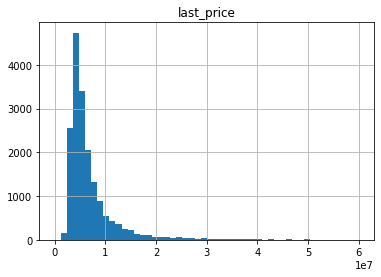

In [48]:
df.boxplot('last_price')
plt.ylim(0, 100000000)
df.hist('last_price', bins=50, range=(0,60000000))

(0, 11800000)

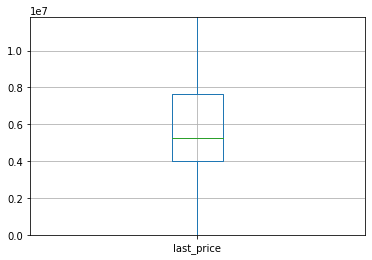

In [49]:
df.boxplot('last_price')
plt.ylim(0, 11800000)

#### Видно, что распределение цен сильно прижато к маленьким значениям, но при этом есть огромный длинный хвост. значение более 40 млн отброшу.

In [50]:
good_last_price = df.query('last_price <= 40000000')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5ecca2d0>]],
      dtype=object)

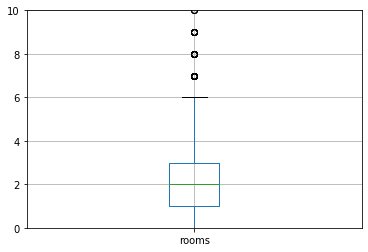

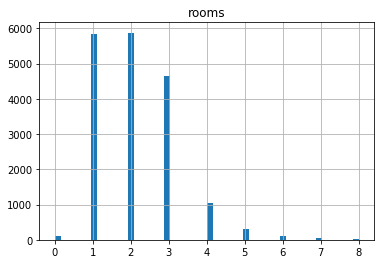

In [51]:
df.boxplot('rooms')
plt.ylim(0, 10)
df.hist('rooms', bins=50, range=(0,8))

#### Медиана и среднее - 2 комнаты, а интервал Q1-Q3 лежит в пределах 1-3 комнат. есть выбросы, но их мало. Будем использовать значения только не более 8 комнат

In [52]:
good_rooms = df.query('rooms < 8')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed616bb1d0>]],
      dtype=object)

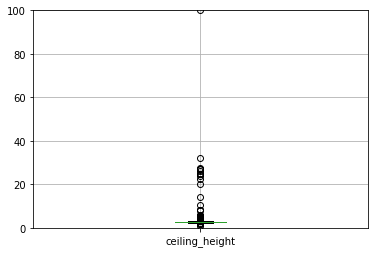

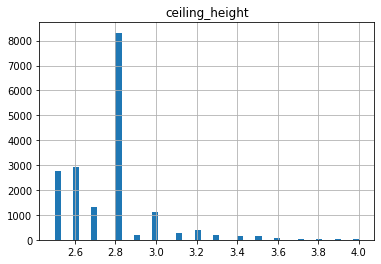

In [53]:
df.boxplot('ceiling_height')
plt.ylim(0, 100)
df.hist('ceiling_height', bins=50, range=(2.5,4))

(0, 4)

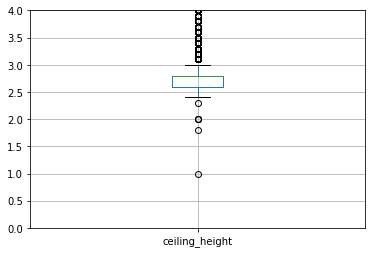

In [54]:
df.boxplot('ceiling_height')
plt.ylim(0, 4)

#### Примечательно, что основной интервал Q1-Q3 максимально сжат около значения 2.6-2.8 м, причем медианное значение и вовсе совпадает с 75%. Выбросы это высота менее 2.4 м и более 3 м. Ограничим нашу выборку от 2.4 до 4 м, больше встречается сильно реже

In [55]:
good_ceiling_height = df.query('2.4 <= ceiling_height <= 4')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5ebb2b10>]],
      dtype=object)

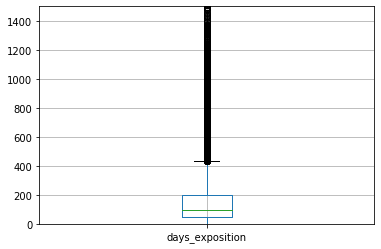

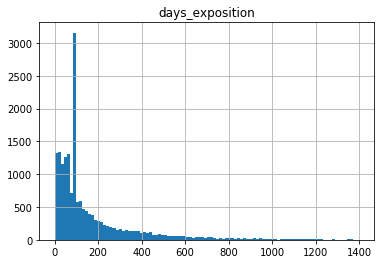

In [56]:
df.boxplot('days_exposition')
plt.ylim(0, 1500)
df.hist('days_exposition', bins=100, range=(0, 1400))

(0, 425)

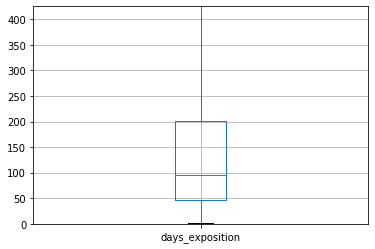

In [57]:
df.boxplot('days_exposition')
plt.ylim(0, 425)

#### Q1-Q3 довольно растянуто от примерно 50 дней до 200, а медиана лежит в нижней части, в районе 100. Выбросами считаю все значения больше 800 дней. Жаль людей, которые продают жилье более 3 лет))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5b4116d0>,
      dtype=object)

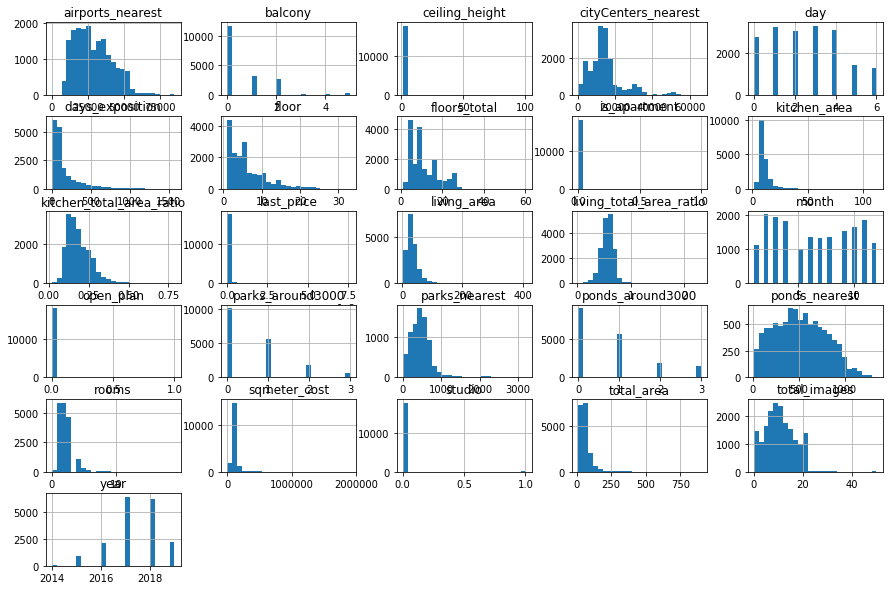

In [94]:
df.hist(bins=25, figsize=(15, 10))

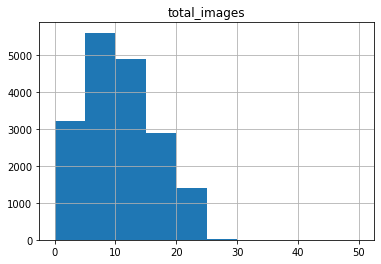

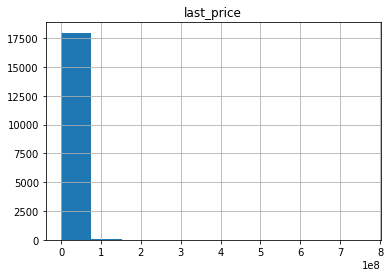

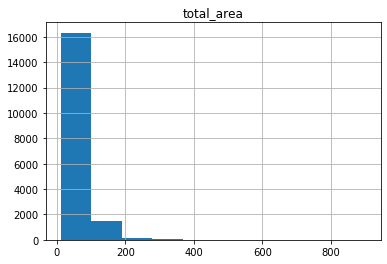

По следующему столбцу нельзя построить гистограмму


In [59]:
try:
    for column in df.columns:
        df.hist(column)
        plt.show()
except: 
    print('По следующему столбцу нельзя построить гистограмму')        

In [60]:
good_days_exposition = df.query('days_exposition <= 800')

#### В целом заметил закономерность, что в распределениях исследуемых величин медианное значение смещено в среднем к нижней границе интервала Q1-Q3. Созданы срезы данных, очищенные от выбросов

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [61]:
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost,day,day_name,month,month_name,year,floor_group,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,Thursday,3,March,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,0,0,0,11.0,2,поселок Шушары,12817,18603,0,NaN,0,NaN,81,82920,1,Tuesday,12,December,2018,первый,0.460396,0.272277


In [62]:
df['last_price'].corr(df['total_area'])

0.6496806300652287

#### Коэф корреляции почти 0.7, что говорит о достаточно сильной связи. Это логично, чем больше площадь жилья, тем дороже оно стоит

In [63]:
df['last_price'].corr(df['rooms'])

0.36906911216704263

#### Коэффициент корреляции 0.36 говорит, что связь по сути отсутствует между ценой продажи и числом комнат.

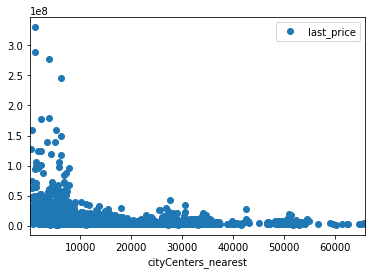

In [64]:
df['last_price'].corr(df['cityCenters_nearest'])
np.round(df.groupby('cityCenters_nearest').agg({'last_price':'mean'})).plot(style='o')

#### Корреляции как таковой нет, однако по графику видно, что с удалением от центра, цена на квартиру падает, однако это зависимость не линейная

In [65]:
np.round(df[['last_price', 'floor_group']].pivot_table(index=['floor_group'], columns='floor_group', aggfunc='mean', fill_value=0))

last_price                      
floor_group     другой     первый  последний
floor_group                                 
другой       7515615.0        0.0        0.0
первый             0.0  5845007.0        0.0
последний          0.0        0.0  9294031.0

#### По таблице выше видно, что квартиры на первом этаже самые дешевые, другие (между первым и последним) в среднем дороже на 29%, а квартиры на последнем этаже дороже других этажей на 24% и на 60% больше первого этажа! Оно и верно. Лучше когда можешь смотреть как птички летают, чем как заходят в подъезд соседи))

In [66]:
day_pivot = np.round(df[['last_price', 'day', 'day_name']].pivot_table(index=['day', 'day_name'], columns='day_name', values='last_price', aggfunc=np.mean, fill_value=0))
day_pivot

,day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
day,day_name,,,,,,,
0,Monday,0.0,7455544.0,0.0,0.0,0.0,0.0,0.0
1,Tuesday,0.0,0.0,0.0,0.0,0.0,7367892.0,0.0
2,Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,7668908.0
3,Thursday,0.0,0.0,0.0,0.0,7743243.0,0.0,0.0
4,Friday,7330564.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Saturday,0.0,0.0,8314266.0,0.0,0.0,0.0,0.0
6,Sunday,0.0,0.0,0.0,7249256.0,0.0,0.0,0.0


In [67]:
day_pivot.max().sort_values(ascending=False)

day_name
Saturday     8314266.0
Thursday     7743243.0
Wednesday    7668908.0
Monday       7455544.0
Tuesday      7367892.0
Friday       7330564.0
Sunday       7249256.0
dtype: float64

#### Зависимость цены продажи от дня публикации не выявлена. Есть только такая тенденция, что средняя цена продажи недвижимости наиболее высокая, если объявление было опубликовано в субботу. Самая низкая средняя цена при публикации в воскресенье.

In [68]:
month_pivot = np.round(df[['last_price', 'month', 'month_name']].pivot_table(index=['month', 'month_name'], columns='month_name', values='last_price', aggfunc=np.mean, fill_value=0))
month_pivot

,month_name,April,August,December,February,January,July,June,March,May,November,October,September
month,month_name,,,,,,,,,,,,
1,January,0.0,0.0,0.0,0.0,7861422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,February,0.0,0.0,0.0,7451645.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,March,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7463635.0,0.0,0.0,0.0,0.0
4,April,7781505.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,May,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7499073.0,0.0,0.0,0.0
6,June,0.0,0.0,0.0,0.0,0.0,0.0,7267155.0,0.0,0.0,0.0,0.0,0.0
7,July,0.0,0.0,0.0,0.0,0.0,7693409.0,0.0,0.0,0.0,0.0,0.0,0.0
8,August,0.0,7265493.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,September,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7923927.0


In [69]:
month_pivot.max().sort_values(ascending=False)

month_name
December     8325961.0
September    7923927.0
January      7861422.0
April        7781505.0
July         7693409.0
May          7499073.0
March        7463635.0
February     7451645.0
November     7382818.0
June         7267155.0
August       7265493.0
October      7074141.0
dtype: float64

#### вывод про месяцы - декабрь самый успешный месяц, октябрь самый неудачный. Зависимости нет, месяца разбросаны случайно

In [70]:
year_pivot = np.round(df[['last_price', 'year']].pivot_table(index=['year'], columns='year', values='last_price', aggfunc=np.mean, fill_value=0))
year_pivot

year,2014,2015,2016,2017,2018,2019
year,,,,,,
2014,13741259.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,9684716.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,7873714.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,7518116.0,0.0,0.0
2018,0.0,0.0,0.0,0.0,6976892.0,0.0
2019,0.0,0.0,0.0,0.0,0.0,7787741.0


In [71]:
year_pivot.max().sort_values(ascending=False)

year
2014    13741259.0
2015     9684716.0
2016     7873714.0
2019     7787741.0
2017     7518116.0
2018     6976892.0
dtype: float64

#### Касательно зависимости цены продажи от года публикации объявления, то видно, что в целом цена снижалась со временем, но 2019 год немного увеличил среднюю цену.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [72]:
grouped_locality = df.groupby('locality_name').agg({'sqmeter_cost':'count'}).sort_values(by='sqmeter_cost', ascending=False).head(10)
grouped_locality['sqmeter_cost_mean'] = np.round(df.groupby('locality_name').agg({'sqmeter_cost': 'mean'}))
grouped_locality

,sqmeter_cost,sqmeter_cost_mean
locality_name,,
Санкт-Петербург,15567,114656.0
поселок Шушары,436,78474.0
Пушкин,368,103070.0
Колпино,337,75402.0
поселок Парголово,327,90175.0
Петергоф,201,84757.0
Сестрорецк,183,101757.0
Красное Село,174,72139.0
Ломоносов,132,72609.0


#### Большинство естественно приходится на СПб, как на районный центр, остальное понятно по таблице

In [73]:
print('Наибольшая средняя цена кв м из ТОП-10 населенных пунктов равна', grouped_locality['sqmeter_cost_mean'].max(), 
      ' в населенном пункте:', grouped_locality['sqmeter_cost_mean'].idxmax())
print('Наименьшая средняя цена кв м из ТОП-10 населенных пунктов равна', grouped_locality['sqmeter_cost_mean'].min(), 
      ' в населенном пункте:', grouped_locality['sqmeter_cost_mean'].idxmin())

Наибольшая средняя цена кв м из ТОП-10 населенных пунктов равна 114656.0  в населенном пункте: Санкт-Петербург
Наименьшая средняя цена кв м из ТОП-10 населенных пунктов равна 72139.0  в населенном пункте: Красное Село


### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [74]:
df_spb = df.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
#df_spb['locality_name'].unique()
df_spb.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost,day,day_name,month,month_name,year,floor_group,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,Thursday,3,March,2019,другой,0.472222,0.231481
1,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,Thursday,8,August,2015,другой,0.612500,0.148214


In [75]:
df_spb['cityCenters_km'] = df_spb['cityCenters_nearest'] / 1000
df_spb['cityCenters_km'] = df_spb['cityCenters_km'].astype('int')
df_spb.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost,day,day_name,month,month_name,year,floor_group,living_total_area_ratio,kitchen_total_area_ratio,cityCenters_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,Thursday,3,March,2019,другой,0.472222,0.231481,16
1,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,Thursday,8,August,2015,другой,0.612500,0.148214,13


In [76]:
df_spb_km_group = np.round(df_spb.groupby('cityCenters_km').agg({'last_price':'mean'}))
df_spb_km_group

,last_price
cityCenters_km,
0,23442315.0
1,18850852.0
2,16163314.0
3,13452830.0
4,13595278.0
5,15072683.0
6,14389106.0
7,12797674.0
8,8430806.0


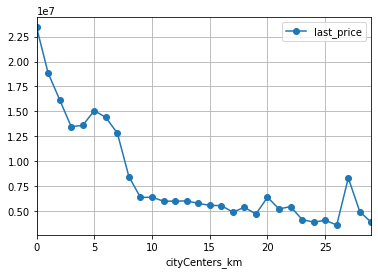

In [77]:
df_spb_km_group.plot(style='o-', grid=True)#, xlim=(0, 10))

#### На графике имеется две границы, после которых меняется направлдение графика - второй пик на 5 км, и 9 км от центра, где график сильно выполаживается. Возможно граница на 9 км от центра является более показательной, но мне кажется корректнее взять 5 км, потому что СПБ не самый большой город, а если судить по карте, то вся центрельная зона имеет диаметр около 10 км. При радиуче 9 км в зону попадут спальные районы на востоке города, что немного некорректно с точки зрения логики. Так что мой вывод, что центр - это недвижимость в радиусе 5 км от центра.

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [78]:
df_spb_center = df_spb.query('cityCenters_km <= 5').reset_index(drop=True)
df_spb_center.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmeter_cost,day,day_name,month,month_name,year,floor_group,living_total_area_ratio,kitchen_total_area_ratio,cityCenters_km
0,8,6500000,97.2,2015-10-31,2,2.8,3,46.5,1,0,0,0,19.6,0,Санкт-Петербург,20052,2336,3,411,3,124,265,66872,5,Saturday,10,October,2015,первый,0.478395,0.201646,2
1,6,15500000,149.0,2017-06-26,5,2.8,5,104.0,4,0,0,0,17.0,0,Санкт-Петербург,23670,3502,0,NaN,1,779,644,104026,0,Monday,6,June,2017,другой,0.697987,0.114094,3


In [79]:
np.round(df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe())

,total_area,last_price,rooms,ceiling_height
count,18040.0,18040.0,18040.0,18040.0
mean,63.0,7560230.0,2.0,3.0
std,39.0,12144036.0,1.0,1.0
min,12.0,12190.0,0.0,1.0
25%,41.0,4000000.0,1.0,3.0
50%,54.0,5250000.0,2.0,3.0
75%,73.0,7650000.0,3.0,3.0
max,900.0,763000000.0,19.0,100.0


In [80]:
np.round(df_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe())

,total_area,last_price,rooms,ceiling_height
count,2822.0,2822.0,2822.0,2822.0
mean,96.0,14994707.0,3.0,3.0
std,60.0,25451367.0,2.0,1.0
min,12.0,1600000.0,0.0,2.0
25%,60.0,6900000.0,2.0,3.0
50%,82.0,9460000.0,3.0,3.0
75%,112.0,14500000.0,4.0,3.0
max,631.0,763000000.0,19.0,32.0


#### По методу .describe() при сравнении исходного датафрейма и датафрейма по центру СПб видно, что: 

#### 1) в центре средняя площадь недвижимости выше на 52%, 

#### 2) средняя цена также выше на 98%, почти вдвое,

#### 3) в СПб в среднем на 1 комнату больше - 3 комнаты в среднем,

#### 4) высота потолков идентична - в среднем 3 метра

Вот так проверялись зависимости параметров для исходного датафрейма:


Теперь проверим то же самое для нового датафрейма:


In [81]:
df_spb_center['last_price'].corr(df_spb_center['total_area'])

0.5921448923667589

#### Зависимость цены от площади осталась, но связь стала слабее.

In [82]:
df_spb_center['last_price'].corr(df_spb_center['rooms'])

0.2941539126520972

#### Можно сказать что зависимости цены от числа комнат в центре Петербурга нет.

In [83]:
df_spb_center['last_price'].corr(df_spb_center['cityCenters_nearest'])

-0.051254436001781006

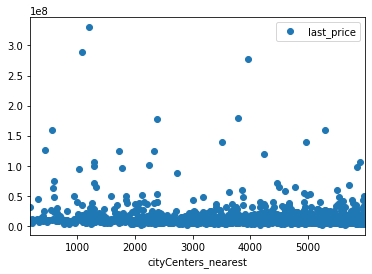

In [84]:
np.round(df_spb_center.groupby('cityCenters_nearest').agg({'last_price':'mean'})).plot(style='o')

#### Связь цены и расстояния до центра ослабла, так как в данный момент мы исследуем самый центр города. Корреляция околонулевая, и график это подтверждает. Разве что отдельные выбросы становятся немного дешевле при удалении до 5 км

In [85]:
np.round(df_spb_center[['last_price', 'floor_group']].pivot_table(index=['floor_group'], columns='floor_group', aggfunc='mean', fill_value=0))

last_price                       
floor_group      другой     первый   последний
floor_group                                   
другой       14933523.0        0.0         0.0
первый              0.0  9449389.0         0.0
последний           0.0        0.0  18688678.0

#### Зависимость та же - первый этаж в среднем самый дешевый, последний - самый дорогой, а "другие" - в среднем между первым и последним.

In [86]:
day_pivot_spb = np.round(df_spb_center[['last_price', 'day', 'day_name']].pivot_table(index=['day', 'day_name'], columns='day_name', values='last_price', aggfunc=np.mean, fill_value=0))
day_pivot_spb
day_pivot_spb.max().sort_values(ascending=False)

day_name
Saturday     20177198.0
Sunday       16062755.0
Wednesday    14801038.0
Friday       14655318.0
Thursday     14621026.0
Monday       14337939.0
Tuesday      14182333.0
dtype: float64

#### По центру самый "успешный" день - тоже суббота, не очень понятно почему, но данные указывают на это.

In [87]:
month_pivot_spb = np.round(df_spb_center[['last_price', 'month', 'month_name']].pivot_table(index=['month', 'month_name'], columns='month_name', values='last_price', aggfunc=np.mean, fill_value=0))
month_pivot_spb
month_pivot_spb.max().sort_values(ascending=False)

month_name
September    16455717.0
April        16086509.0
March        15901972.0
February     15821408.0
December     15738815.0
January      15664549.0
July         14845774.0
May          14602419.0
October      14229114.0
November     14111092.0
August       14031072.0
June         12013149.0
dtype: float64

#### самый хороший месяц - сентябрь, плохой - июнь. Зависимости не было, и она не появилась.

In [88]:
year_pivot_spb = np.round(df_spb_center[['last_price', 'year']].pivot_table(index=['year'], columns='year', values='last_price', aggfunc=np.mean, fill_value=0))
year_pivot_spb
year_pivot_spb.max().sort_values(ascending=False)

year
2014    26600810.0
2015    17152219.0
2019    16126911.0
2017    15454271.0
2016    14506055.0
2018    13255143.0
dtype: float64

#### По центру Питера в целом тоже имеется определенный нисходящий тренд от 2014 к 2019, однако о зависимости говорить уже не стоит.

### Шаг 5. Общий вывод

В результате выполнения проекта был проведен исследовательский анализ данных относительно недвижимости в Ленинградской области. Данные были предобработаны, очищены и подготовлены к дальнейшему анализу. Были сделаны выводы относительно возможных причин пропусков и ошибок в данных. Были изучены указанные в задании показатели, с помощью методов describe и построения гистограмм, графиков, рассмотрены статистические показатели для некоторых столбцов (площадь, цена, высота потолков, цена комнат). Затем были оценены зависимости разных параметров на итоговую цену продажи недвижимости. Оказалось, что цена и площадь связаны очень сильно, что логично, есть зависимость цены от этажа, от удаленности от центра. А вот зависимости от дня, месяца и года публикации объявления как таковой не выявлено. Затем были выделены 10 самых частых по объявлениям населенных пунктов, выделены самый дорогой и дешевый по недвижимости населенный пункт (это санкт-петербург и Кронштадт соответственно). После этого была определена граница зоны центра СПб по величине 5 км и аналогичный анализ зависимостей был произведен для объявлений, попавших в центральную зону Санкт-Петербурга. В целом, зависимости цены и исследуемых факторов остались аналогичными прежним. Ровно как и параметры, у которых зависимости нет.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычнo занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод